## Phase 3 Project

# 1. Business understanding

## Project Goal
### To predict whether there is a pattern of customers who will ("soon") stop doing business with SyriaTel, a telecommunications company.

### The audience are the telecom business staff whose interest is reducing how much money is lost because of customers who don’t want to stay with the company very long. 

## Objectives
### To determine if there is a predictive pattern of customers who will ("soon") stop doing bussiness with SyriaTel. 

# 2. Data understanding

### 2.1 Loading the data

In [1]:
# importing the necessary Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings
warnings.filterwarnings("ignore")
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import LabelEncoder


In [2]:
# Importing the data
df = pd.read_csv('bigml_csv.csv', index_col = 0)
df.head()   # retuns 3333 entries and 20 columns

,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
state,,,,,,,,,,,,,,,,,,,,
KS,128,415,382-4657,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
OH,107,415,371-7191,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
NJ,137,415,358-1921,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
OH,84,408,375-9999,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
OK,75,415,330-6626,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [3]:
# more information about the data
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3333 entries, KS to TN
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   account length          3333 non-null   int64  
 1   area code               3333 non-null   int64  
 2   phone number            3333 non-null   object 
 3   international plan      3333 non-null   object 
 4   voice mail plan         3333 non-null   object 
 5   number vmail messages   3333 non-null   int64  
 6   total day minutes       3333 non-null   float64
 7   total day calls         3333 non-null   int64  
 8   total day charge        3333 non-null   float64
 9   total eve minutes       3333 non-null   float64
 10  total eve calls         3333 non-null   int64  
 11  total eve charge        3333 non-null   float64
 12  total night minutes     3333 non-null   float64
 13  total night calls       3333 non-null   int64  
 14  total night charge      3333 non-null   float6

# 3. Data Preparation

In [4]:
# format the naming of the columns #  Replace the spaces with '_'
df.rename(columns=lambda x: x.replace(' ', '_'), inplace=True)

In [5]:
# check the formated column names
print(df.columns)

Index(['account_length', 'area_code', 'phone_number', 'international_plan',
       'voice_mail_plan', 'number_vmail_messages', 'total_day_minutes',
       'total_day_calls', 'total_day_charge', 'total_eve_minutes',
       'total_eve_calls', 'total_eve_charge', 'total_night_minutes',
       'total_night_calls', 'total_night_charge', 'total_intl_minutes',
       'total_intl_calls', 'total_intl_charge', 'customer_service_calls',
       'churn'],
      dtype='object')


### 3.1. Check for missing values

In [6]:
# checking for missing values
df.isnull().sum()

account_length            0
area_code                 0
phone_number              0
international_plan        0
voice_mail_plan           0
number_vmail_messages     0
total_day_minutes         0
total_day_calls           0
total_day_charge          0
total_eve_minutes         0
total_eve_calls           0
total_eve_charge          0
total_night_minutes       0
total_night_calls         0
total_night_charge        0
total_intl_minutes        0
total_intl_calls          0
total_intl_charge         0
customer_service_calls    0
churn                     0
dtype: int64

### There are no missing values

In [7]:
# Format the columns to remove any spaces from the column lables
df.columns = df.columns.str.strip()

In [8]:
# print the column names
print(df.columns)

Index(['account_length', 'area_code', 'phone_number', 'international_plan',
       'voice_mail_plan', 'number_vmail_messages', 'total_day_minutes',
       'total_day_calls', 'total_day_charge', 'total_eve_minutes',
       'total_eve_calls', 'total_eve_charge', 'total_night_minutes',
       'total_night_calls', 'total_night_charge', 'total_intl_minutes',
       'total_intl_calls', 'total_intl_charge', 'customer_service_calls',
       'churn'],
      dtype='object')


In [9]:
# print the unique values of area code
df['area_code'].unique()

array([415, 408, 510], dtype=int64)

### 3.2. Defining the features (X) and target (y)

In [10]:
# Defining the features (X) and target (y)
X_features = df.drop('churn', axis=1)
y_target = df['churn']

In [11]:
#convert categorical variables to numerical
# drop-first = True
X_numerical = pd.get_dummies(X_features, drop_first = True)
X_numerical.head(5)

,account_length,area_code,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,...,phone_number_422-5874,phone_number_422-6685,phone_number_422-6690,phone_number_422-7728,phone_number_422-8268,phone_number_422-8333,phone_number_422-8344,phone_number_422-9964,international_plan_yes,voice_mail_plan_yes
state,,,,,,,,,,,,,,,,,,,,,
KS,128,415,25,265.1,110,45.07,197.4,99,16.78,244.7,...,0,0,0,0,0,0,0,0,0,1
OH,107,415,26,161.6,123,27.47,195.5,103,16.62,254.4,...,0,0,0,0,0,0,0,0,0,1
NJ,137,415,0,243.4,114,41.38,121.2,110,10.30,162.6,...,0,0,0,0,0,0,0,0,0,0
OH,84,408,0,299.4,71,50.90,61.9,88,5.26,196.9,...,0,0,0,0,0,0,0,0,1,0
OK,75,415,0,166.7,113,28.34,148.3,122,12.61,186.9,...,0,0,0,0,0,0,0,0,1,0


In [12]:
# Encode 'churn'
# print y_encode
y_encode = y_target.astype(int)
y_encode

state
KS    0
OH    0
NJ    0
OH    0
OK    0
     ..
AZ    0
WV    0
RI    0
CT    0
TN    0
Name: churn, Length: 3333, dtype: int32

In [13]:
#encode area code
df['area_code'] = LabelEncoder().fit_transform(df['area_code'])
df['area_code']

state
KS    1
OH    1
NJ    1
OH    0
OK    1
     ..
AZ    1
WV    1
RI    2
CT    2
TN    1
Name: area_code, Length: 3333, dtype: int64

### 3.3 Selecting the features for modelling

In [14]:
# Selecting the features for medelling
X = X_numerical[['account_length', 'area_code', 'total_day_charge', 'total_eve_charge', 'total_night_charge', 'total_intl_charge']]
y = y_encode

In [15]:
# print X
print(X)

       account_length  area_code  total_day_charge  total_eve_charge  \
state                                                                  
KS                128        415             45.07             16.78   
OH                107        415             27.47             16.62   
NJ                137        415             41.38             10.30   
OH                 84        408             50.90              5.26   
OK                 75        415             28.34             12.61   
...               ...        ...               ...               ...   
AZ                192        415             26.55             18.32   
WV                 68        415             39.29             13.04   
RI                 28        510             30.74             24.55   
CT                184        510             36.35             13.57   
TN                 74        415             39.85             22.60   

       total_night_charge  total_intl_charge  
state           

In [16]:
#print y
y

state
KS    0
OH    0
NJ    0
OH    0
OK    0
     ..
AZ    0
WV    0
RI    0
CT    0
TN    0
Name: churn, Length: 3333, dtype: int32

## 4. Modelling

### 4.1 Modelling Using statsmodels

In [17]:
# fit the baseline Logistic Regression model using statsmodels
# Add a constant (intercept) term to the features
X_constant = sm.add_constant(X)

# Create and fit the Logistic Regression model
logistic_model = sm.Logit(y, X_constant)
results = logistic_model.fit()

Optimization terminated successfully.
         Current function value: 0.384108
         Iterations 7


In [18]:
# Print summary
print(results.summary())

                           Logit Regression Results                           
Dep. Variable:                  churn   No. Observations:                 3333
Model:                          Logit   Df Residuals:                     3326
Method:                           MLE   Df Model:                            6
Date:                Sat, 10 May 2025   Pseudo R-squ.:                 0.07172
Time:                        17:59:59   Log-Likelihood:                -1280.2
converged:                       True   LL-Null:                       -1379.1
Covariance Type:            nonrobust   LLR p-value:                 5.506e-40
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -6.8268      0.696     -9.806      0.000      -8.191      -5.462
account_length         0.0012      0.001      0.954      0.340      -0.001       0.004
area_code           

#### Pseudo R-Squared of 0.07172 indicated that the model explains only 7.17% of the variability

In [19]:
# Printing the coefficients
print(results.params)

const                -6.826829
account_length        0.001220
area_code             0.000664
total_day_charge      0.067466
total_eve_charge      0.066206
total_night_charge    0.050466
total_intl_charge     0.293521
dtype: float64


#### The coefficients indicate that total_day_charge, total_eve_charge, total_night_charge, total_intl_charge are significant and influence whether whether one churns or not.
#### A unit increase in international charge increases the chance of churn by 29%.  

### 4.2. Modelling using scikit-learn

In [20]:
# import the necessary library
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score

In [21]:
# Select the features (X) and target (y)
X = X_numerical[['account_length', 'area_code', 'total_day_charge', 'total_eve_charge', 'total_night_charge', 'total_intl_charge']]
y = y_encode


In [22]:
# train and split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,
                                                    random_state=42)


In [23]:
#view the lengths of the results
print(len(X_train), len(X_test), len(y_train), len(y_test))

2666 667 2666 667


In [24]:
# Train and fit model
model2 = LogisticRegression()
results2 = model2.fit(X_train, y_train)

In [25]:
print(results.summary())

                           Logit Regression Results                           
Dep. Variable:                  churn   No. Observations:                 3333
Model:                          Logit   Df Residuals:                     3326
Method:                           MLE   Df Model:                            6
Date:                Sat, 10 May 2025   Pseudo R-squ.:                 0.07172
Time:                        18:00:18   Log-Likelihood:                -1280.2
converged:                       True   LL-Null:                       -1379.1
Covariance Type:            nonrobust   LLR p-value:                 5.506e-40
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -6.8268      0.696     -9.806      0.000      -8.191      -5.462
account_length         0.0012      0.001      0.954      0.340      -0.001       0.004
area_code           

In [26]:
# Make predictions on the test data
y_pred = model2.predict(X_test)

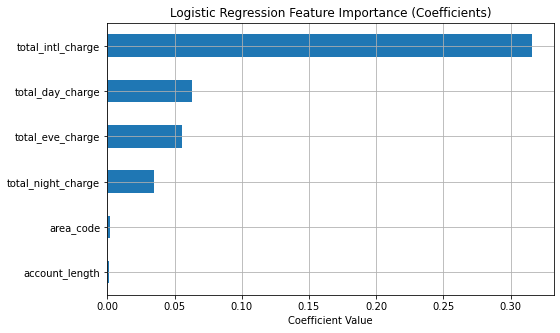

In [27]:
#plotting coeficients vs features

coefs = pd.Series(model2.coef_[0], index=X.columns).sort_values()

plt.figure(figsize=(8, 5))
coefs.plot(kind='barh')
plt.title('Logistic Regression Feature Importance (Coefficients)')
plt.xlabel('Coefficient Value')
plt.grid(True)
plt.show()

In [28]:
coefs

account_length        0.001590
area_code             0.002292
total_night_charge    0.034522
total_eve_charge      0.055797
total_day_charge      0.062950
total_intl_charge     0.316269
dtype: float64

### The most important feature is the total_intl_charge
#### A unit increase in international charge increases the chance of churn by 31%.

In [29]:
#Evaluation using mse and r squared
 
mse = mean_squared_error(y_test, y_pred) 
r2 = r2_score(y_test, y_pred) # 0-1: the higher(closer to 1) the better the model
print("mse", mse)
print ("r2:", r2)

mse 0.14992503748125938
r2: -0.16677745513067221


### A negative r2 indicated that the model is performing poorly

In [30]:
# Evaluate the model on training data
train_pred = model2.predict(X_train)
print("Training Accuracy:", accuracy_score(y_train, train_pred)) # checking the accracy of the training data
print("Training report")
print(classification_report(y_train, train_pred))

#f1 is a combination of precision and recall

Training Accuracy: 0.858589647411853
Training report
              precision    recall  f1-score   support

           0       0.86      1.00      0.92      2284
           1       1.00      0.01      0.03       382

    accuracy                           0.86      2666
   macro avg       0.93      0.51      0.47      2666
weighted avg       0.88      0.86      0.80      2666



### The results indicate that the model accurately predicts whether one will churn or not churn SyriaTel 86% of the time when using the training data
### The f1 score for the class 0 is 0.92. However, the f1 score for class 1 is very low 0.02. This is due to the data imbalances, there are more instances for class 0 (2284) compared to class 1(382)

## 4.3 Confusion Matrix

In [32]:
# import library
from sklearn.metrics import confusion_matrix


In [33]:
# Evaluate on testing data
test_pred = model2.predict(X_test)
print("Testing Accuracy:", accuracy_score(y_test, test_pred)) # checking the accracy of he training data
print("Testing report")
print(classification_report(y_test, test_pred))

Testing Accuracy: 0.8500749625187406
Testing report
              precision    recall  f1-score   support

           0       0.85      1.00      0.92       566
           1       1.00      0.01      0.02       101

    accuracy                           0.85       667
   macro avg       0.92      0.50      0.47       667
weighted avg       0.87      0.85      0.78       667



## 5. Evaluation using ROC and AUC

In [34]:
# addressing the data imbalances

from sklearn.metrics import roc_curve, auc

# Scikit-learn's built in roc_curve method returns the fpr, tpr, and thresholds

# Calculate the probability scores of each of the datapoints:
y_score = model2.fit(X_train, y_train).decision_function(X_test)

fpr, tpr, thresholds = roc_curve(y_test, y_score)

In [35]:
roc_auc = auc(fpr, tpr)
roc_auc

0.7116467830528636

In [36]:
# Print the AUC
print('AUC: {}'.format(auc(fpr, tpr)))

AUC: 0.7116467830528636


### The model has a moderate ability of prediction. The model has a 71.16% chance of predictily correctly the negative and positive classes. 

AUC: 0.7116467830528636


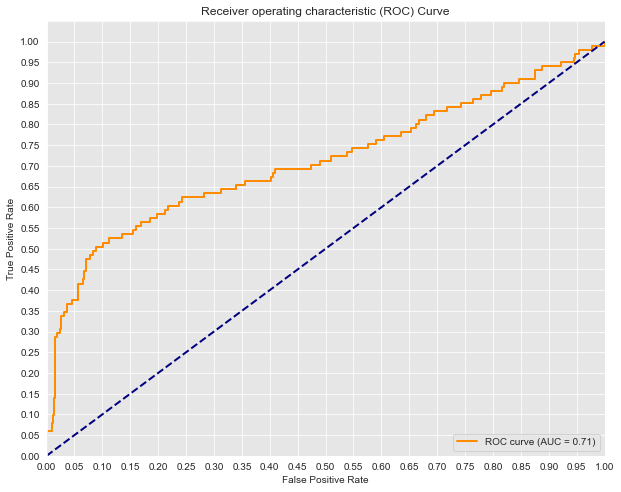

In [37]:
# Visualizing the ROC and AUC

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Seaborn's beautiful styling
sns.set_style('darkgrid', {'axes.facecolor': '0.9'})

print('AUC: {}'.format(auc(fpr, tpr)))
plt.figure(figsize=(10, 8))
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (AUC = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.yticks([i/20.0 for i in range(21)])
plt.xticks([i/20.0 for i in range(21)])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


## Scaling the data

In [38]:
# import the libraries
from sklearn.preprocessing import MinMaxScaler, PolynomialFeatures, StandardScaler

X = X_numerical[['account_length', 'area_code', 'total_day_charge', 'total_eve_charge', 'total_night_charge', 'total_intl_charge']]
y = y_encode

# train and split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,
                                                    random_state=42)

# Standardize tha data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# train and fit the model
model3 = LogisticRegression()
results3 = model3.fit(X_train_scaled, y_train)
results3

LogisticRegression()

# Hyperparameter Tuning in Decision Trees

In [52]:
#import the libraries
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error


In [53]:
# define the data
X = X_numerical[['account_length', 'total_day_charge', 'total_eve_charge', 'total_night_charge', 'total_intl_charge']]
y = df['churn']

In [54]:
# Train and split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1000)

In [55]:
# Define the parameter grid to tune the hyperparameters
param_grid = {
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Instantiating the model
dtree_reg = DecisionTreeRegressor(random_state=1000)

# Perform the grid search
grid_search = GridSearchCV(estimator=dtree_reg, param_grid=param_grid,
                           cv=5, n_jobs=-1, verbose=2, scoring='neg_mean_squared_error')


In [56]:
# Fit the model
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 36 candidates, totalling 180 fits


GridSearchCV(cv=5, estimator=DecisionTreeRegressor(random_state=1000),
             n_jobs=-1,
             param_grid={'max_depth': [10, 20, 30, None],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10]},
             scoring='neg_mean_squared_error', verbose=2)

In [57]:
# Get the best estimator from the grid search
best_dtree_reg = grid_search.best_estimator_

# Predict on the test set
y_pred = best_dtree_reg.predict(X_test)

# Calculate Mean Squared Error and RMSE
mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5

In [58]:
# Get the best hyperparameters
best_params = grid_search.best_params_
print(f"Best parameters: {best_params}")
print(f"Test RMSE: {rmse}")

Best parameters: {'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 10}
Test RMSE: 0.33638802926946276


### RMSE is 0.336 which is better that the baseline model where the RMSE was negative

# GitHub repository link: 